# Exercise 1: Employment

In this task we are given a set of features of 5412 workers who were surveyed in the April 2008 Current Population Survey and reported that they were employed. 
The data file contains their employment status in April 2009, one year later, along with some additional variables.

Our task is to predict whether the employee will still be employed in 2009 based on the information from 2008.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load data 

In [2]:
train_data = pd.read_csv("employment_train.csv")
test_features = pd.read_csv("employment_test.csv")
sample = pd.read_csv("employment_test_sample.csv")

## 1. Exploring data

In [3]:
# Taking a first look
train_data.head()

,Unnamed: 0,age,race,earnwke,employed,unemployed,married,union,ne_states,so_states,...,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,0,53,1,NaN,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,39,1,NaN,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
2,2,41,1,500,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,3,27,1,520,1,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
4,4,29,3,615,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [4]:
train_data.describe()

,Unnamed: 0,age,race,employed,unemployed,married,union,ne_states,so_states,ce_states,...,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
count,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,...,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000
mean,2701.044321,42.123177,1.226401,0.889870,0.040292,0.647928,0.126055,0.209325,0.293170,0.249808,...,0.177283,0.706639,0.116078,0.068496,0.274751,0.197429,0.110514,0.221796,0.127015,0.485994
std,1566.134437,11.358779,0.563532,0.313082,0.196661,0.477662,0.331943,0.406866,0.455259,0.432943,...,0.381945,0.455346,0.320350,0.252619,0.446431,0.398097,0.313560,0.415494,0.333021,0.499852
min,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1340.750000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2694.500000,43.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4059.250000,51.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5411.000000,63.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
num_rows, num_columns = train_data.shape
print("Number of rows: ", num_rows)
print("Number of columns: ", num_columns)

Number of rows:  5212
Number of columns:  22


In [6]:
print("Data types of each column:")
print(train_data.dtypes)

Data types of each column:
Unnamed: 0       int64
age              int64
race             int64
earnwke         object
employed         int64
unemployed       int64
married          int64
union            int64
ne_states        int64
so_states        int64
ce_states        int64
we_states        int64
government       int64
private          int64
self             int64
educ_lths        int64
educ_hs          int64
educ_somecol     int64
educ_aa          int64
educ_bac         int64
educ_adv         int64
female           int64
dtype: object


As the "earnwke" column is in string type and not float we have to transform it. Before we can do this, we also have to change the commas to dots, as this is used in the standard float notation. 

In [7]:
#Replacing Commas with Dots in order to convert them to float afterwards
train_data["earnwke"] = train_data["earnwke"].str.replace(',', '.', regex=False)
#Converting the "earnwke" column from string to integer 
train_data["earnwke"] = train_data["earnwke"].astype(float)

#Replacing Commas with Dots in order to convert them to float afterwards
test_features["earnwke"] = test_features["earnwke"].str.replace(',', '.', regex=False)
#Converting the "earnwke" column from string to integer 
test_features["earnwke"] = test_features["earnwke"].astype(float)

Our target is "employed". Let us have a look which values are how often present. 
Reminder: The value 1 indicates that the surveyed individual was still employed one year after the survey while 0 means that he is not employed anymore.

In [8]:
employed = train_data[["employed"]].value_counts()
employed

employed
1           4638
0            574
dtype: int64

In the next step let's have a look at the correlation of the columns in our data: 

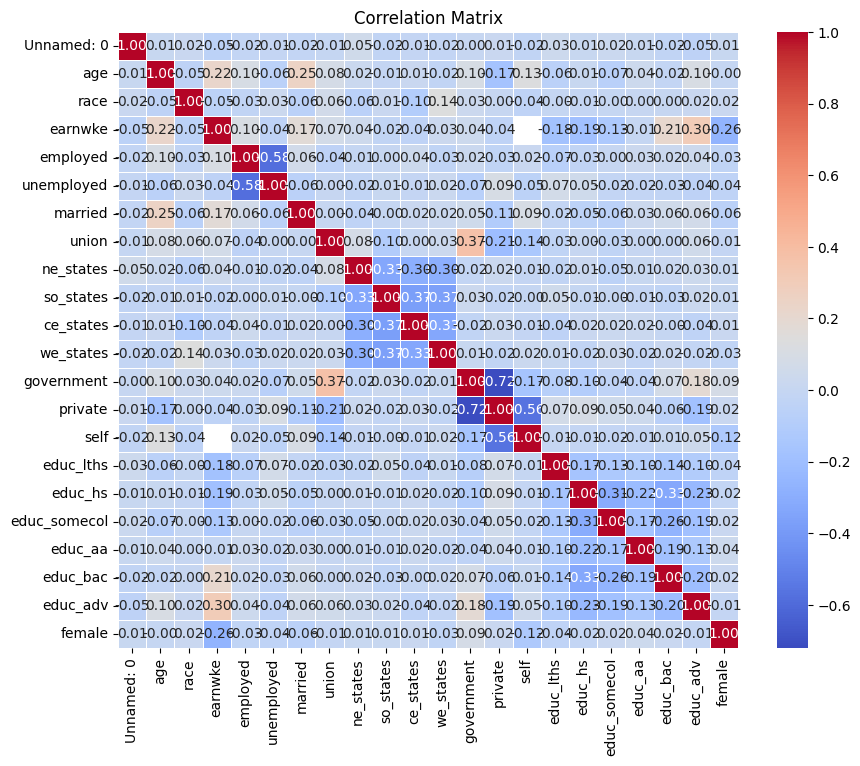

In [9]:
correlation_matrix = train_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix  we can see a high negative correlation between "government" and "private" which is not surprising, as individuals often work either for the government or a privat firm. This also explains the negative correlation between "private" and "self". 

Another interesting observation is the score of the negative correlation for "employed" and "unemployed". As these two options of the survey should be opposite of each other we should have a score of -1. A score less than this indicates, that there are instances where both options got the same entry which makes no sense. As we can't learn from these samples, we simply delete them. 

In [10]:
train_data = train_data[train_data["employed"] != train_data["unemployed"]]

In [11]:
# See correlation of features to target
train_data.corr()['employed'].sort_values(ascending=False)

employed        1.000000
government      0.070972
age             0.063335
married         0.061731
self            0.051147
earnwke         0.050714
educ_adv        0.045176
female          0.032761
educ_bac        0.028499
ne_states       0.023331
educ_aa         0.020952
educ_somecol    0.015910
ce_states       0.012490
Unnamed: 0      0.008797
union          -0.004748
so_states      -0.011236
we_states      -0.022690
race           -0.028610
educ_hs        -0.048244
educ_lths      -0.073739
private        -0.095344
unemployed     -1.000000
Name: employed, dtype: float64

to drop => union, so_states, we_states, race, educ_hs, educ_lths, private.

In [12]:
train_data

,Unnamed: 0,age,race,earnwke,employed,unemployed,married,union,ne_states,so_states,...,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,0,53,1,NaN,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,39,1,NaN,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
2,2,41,1,500.00,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,3,27,1,520.00,1,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
4,4,29,3,615.00,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5207,5407,24,1,300.00,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
5208,5408,50,2,562.50,1,0,0,1,1,0,...,1,0,0,0,1,0,0,0,0,1
5209,5409,44,1,1038.46,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
5210,5410,49,2,640.00,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1


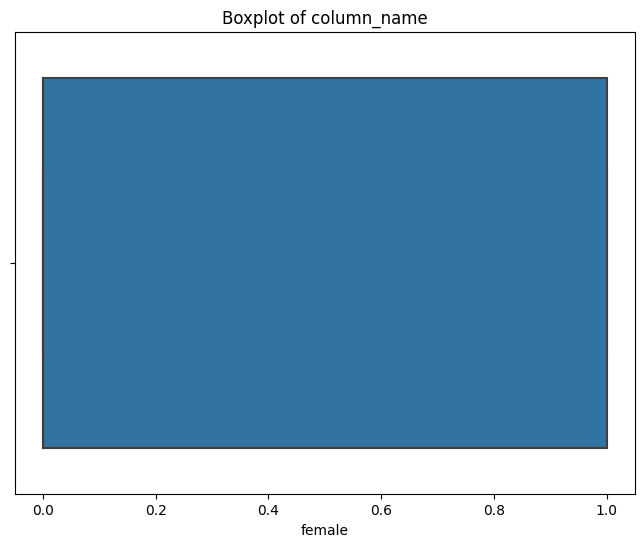

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting boxplot for a specific column
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_data['female'])
plt.title('Boxplot of column_name')
plt.show()

In [14]:
print("Column names:")
print(pd.Series(train_data.columns))

Column names:
0       Unnamed: 0
1              age
2             race
3          earnwke
4         employed
5       unemployed
6          married
7            union
8        ne_states
9        so_states
10       ce_states
11       we_states
12      government
13         private
14            self
15       educ_lths
16         educ_hs
17    educ_somecol
18         educ_aa
19        educ_bac
20        educ_adv
21          female
dtype: object


Looking at the column names, we can see that out of the 22 columns, 19 are actual features and the remaining three are: Index ("Unnamed: 0"), and the targets ("employed" resp. "unemployed"). Other than the 19 feature columns we only need one target column, as the values of the "unemployed" are the opposite of the ones of the "employed" column. We therefore drop the unnecessary columns. 

In [15]:
train_data = train_data.drop(columns = ["Unnamed: 0", "unemployed", "union", "so_states", "we_states", "race", 
                                        "educ_hs", "educ_lths", "private"])

As we could already observe from a first look into the data, we have some NaN values. Let's see where they are and how many we have: 

In [16]:
nan_values = train_data.isna()
columns_with_nans = nan_values.any()

print("Columns with NaN values: ") 
print(columns_with_nans)

nan_count_per_column = nan_values.sum()
print("\nNumber of NaN values per column: ")
print(nan_count_per_column)

Columns with NaN values: 
age             False
earnwke          True
employed        False
married         False
ne_states       False
ce_states       False
government      False
self            False
educ_somecol    False
educ_aa         False
educ_bac        False
educ_adv        False
female          False
dtype: bool

Number of NaN values per column: 
age               0
earnwke         556
employed          0
married           0
ne_states         0
ce_states         0
government        0
self              0
educ_somecol      0
educ_aa           0
educ_bac          0
educ_adv          0
female            0
dtype: int64


To handle these missing values, we fill them up with the mean values:

In [17]:
train_data = train_data.fillna(train_data.mean())
train_data

,age,earnwke,employed,married,ne_states,ce_states,government,self,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,53,865.768865,1,1,0,1,0,1,1,0,0,0,0
1,39,865.768865,1,1,0,1,0,1,0,0,1,0,1
2,41,500.000000,1,1,0,0,0,0,1,0,0,0,1
3,27,520.000000,1,1,0,0,0,0,0,0,0,0,0
4,29,615.000000,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5207,24,300.000000,1,0,1,0,0,0,1,0,0,0,0
5208,50,562.500000,1,0,1,0,1,0,0,0,0,0,1
5209,44,1038.460000,1,0,0,0,1,0,0,0,0,1,0
5210,49,640.000000,1,0,0,0,0,0,0,1,0,0,1


Now we look for NaN values in our test set: 

In [18]:
nan_values = test_features.isna()
columns_with_nan = nan_values.any()

nan_count_per_column = nan_values.sum()
nan_count_per_column

Unnamed: 0       0
age              0
race             0
earnwke         34
married          0
union            0
ne_states        0
so_states        0
ce_states        0
we_states        0
government       0
private          0
self             0
educ_lths        0
educ_hs          0
educ_somecol     0
educ_aa          0
educ_bac         0
educ_adv         0
female           0
dtype: int64

In [19]:
test_features = test_features.fillna(test_features.mean())
test_features

,Unnamed: 0,age,race,earnwke,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,43,59,1,2884.610000,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,45,57,3,1360.000000,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
2,64,45,1,446.800000,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3,86,61,1,2884.610000,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4,94,23,1,512.000000,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5144,56,1,414.000000,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
196,5190,62,1,440.000000,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
197,5296,62,3,250.000000,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
198,5313,56,1,291.900000,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1


In [20]:
nan_values = test_features.isna()
columns_with_nan = nan_values.any()

nan_count_per_column = nan_values.sum()
nan_count_per_column

Unnamed: 0      0
age             0
race            0
earnwke         0
married         0
union           0
ne_states       0
so_states       0
ce_states       0
we_states       0
government      0
private         0
self            0
educ_lths       0
educ_hs         0
educ_somecol    0
educ_aa         0
educ_bac        0
educ_adv        0
female          0
dtype: int64

As we can see, we have successfully handled all missing values! We can now go on to train our models.

### Handling class imbalance

We have an highly imbalanced dataset, as we can see in the following plot: 

{0: 210, 1: 4638}


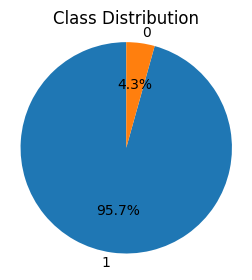

In [22]:
labels = train_data["employed"]
class_counts = labels.value_counts()

print(dict(zip(*np.unique(labels, return_counts=True))))

# Create a pie plot
plt.figure(figsize=(3, 3))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

First we have to split in train and test. And only the train data is resample.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop("employed", axis=1), train_data["employed"], test_size=0.3, random_state=42)

Let's handle this by applying SMOTE oversampling of the minority class: 

Before SMOTE:  {0: 210, 1: 4638}
After SMOTE:  {0: 3260, 1: 3260}


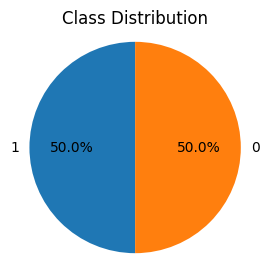

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

print("Before SMOTE: ", dict(zip(*np.unique(labels, return_counts=True))))

# Define SMOTE model
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Summarize new class distribution
print("After SMOTE: ", dict(zip(*np.unique(y_train_smote, return_counts=True))))
class_counts = y_train_smote.value_counts()

# Create a pie plot
plt.figure(figsize=(3, 3))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Let's try another resampling method: 

In [25]:
from sklearn.utils import resample

# Concatenate the features and labels
combi = pd.concat([X_train, y_train], axis=1)

train_data_majority = combi[(combi['employed']==1)] 
train_data_minority = combi[(combi['employed']==0)] 

train_data_minority_upsampled = resample(train_data_minority, 
                                 replace=True,    
                                 n_samples= 4638, 
                                 random_state=0)  

train_data_upsampling = pd.concat([train_data_minority_upsampled, train_data_majority])

# Separate features and labels again
X_train_upsampled = train_data_upsampling.drop('employed', axis=1)
y_train_upsampled = train_data_upsampling['employed']

## Training a classifier

### Decision Tree

In [26]:
# With smote
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Initialize Decision Tree classifier
tree_classifier = DecisionTreeClassifier()

# Train the classifier
tree_classifier.fit(X_train_smote, y_train_smote)

# Make predictions
tree_predictions = tree_classifier.predict(X_test)

# Calculate accuracy
tree_accuracy = accuracy_score(y_test, tree_predictions)

# Calculate F1-score
tree_f1 = f1_score(y_test, tree_predictions)

print("Decision Tree Classifier:")
print("Accuracy:", tree_accuracy)
print("F1-score:", tree_f1)

Decision Tree Classifier:
Accuracy: 0.8838487972508591
F1-score: 0.9376613795647363


In [27]:
# With upsampling
# Initialize Decision Tree classifier
tree_classifier = DecisionTreeClassifier()

# Train the classifier
tree_classifier.fit(X_train_upsampled, y_train_upsampled)

# Make predictions
tree_predictions = tree_classifier.predict(X_test)

# Calculate accuracy
tree_accuracy = accuracy_score(y_test, tree_predictions)

# Calculate F1-score
tree_f1 = f1_score(y_test, tree_predictions)

print("Decision Tree Classifier:")
print("Accuracy:", tree_accuracy)
print("F1-score:", tree_f1)

Decision Tree Classifier:
Accuracy: 0.9243986254295533
F1-score: 0.9605168700646087


### Random Forest

In [28]:
# Smote
from sklearn.ensemble import RandomForestClassifier

# Initialize Decision Tree classifier
rf = RandomForestClassifier()

# Train the classifier
rf.fit(X_train_smote, y_train_smote)

# Make predictions
tree_predictions = rf.predict(X_test)

# Calculate accuracy
tree_accuracy = accuracy_score(y_test, tree_predictions)

# Calculate F1-score
tree_f1 = f1_score(y_test, tree_predictions)

print("Random Forest:")
print("Accuracy:", tree_accuracy)
print("F1-score:", tree_f1)

Random Forest:
Accuracy: 0.89553264604811
F1-score: 0.9442406456346295


In [29]:
# Upsampling
from sklearn.ensemble import RandomForestClassifier

# Initialize Decision Tree classifier
rf = RandomForestClassifier()

# Train the classifier
rf.fit(X_train_upsampled, y_train_upsampled)

# Make predictions
tree_predictions = rf.predict(X_test)

# Calculate accuracy
tree_accuracy = accuracy_score(y_test, tree_predictions)

# Calculate F1-score
tree_f1 = f1_score(y_test, tree_predictions)

print("Random Forest:")
print("Accuracy:", tree_accuracy)
print("F1-score:", tree_f1)

Random Forest:
Accuracy: 0.9374570446735395
F1-score: 0.9676731793960923


### XGBoost

In [30]:
# Smote
import xgboost as xgb

# Initialize XGBoost classifier with appropriate hyperparameters
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train_smote, y_train_smote)

# Make predictions
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Calculate F1-score
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("F1-score:", f1)

Accuracy: 0.8893470790378006
F1-score: 0.9407870540639942


In [31]:
# Upsampling
import xgboost as xgb

# Initialize XGBoost classifier with appropriate hyperparameters
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train_upsampled, y_train_upsampled)

# Make predictions
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Calculate F1-score
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("F1-score:", f1)

Accuracy: 0.9003436426116839
F1-score: 0.9474827960883738


### Multilayer Perceptron

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Example of using an advanced optimizer and modifying the hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, alpha=1e-4,
                    solver='adam', verbose=10, random_state=0,
                    learning_rate_init=0.01, learning_rate='adaptive')

# Normalize dataset for NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Fit
mlp.fit(X_train_scaled, y_train_smote)

predictions = mlp.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Calculate F1-score
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("F1-score:", f1)

Iteration 1, loss = 0.37303819
Iteration 2, loss = 0.31482559
Iteration 3, loss = 0.30393603
Iteration 4, loss = 0.29719465
Iteration 5, loss = 0.29598944
Iteration 6, loss = 0.29002858
Iteration 7, loss = 0.28691199
Iteration 8, loss = 0.28249802
Iteration 9, loss = 0.28040879
Iteration 10, loss = 0.27869580
Iteration 11, loss = 0.27822529
Iteration 12, loss = 0.27429314
Iteration 13, loss = 0.26939918
Iteration 14, loss = 0.26426111
Iteration 15, loss = 0.26658704
Iteration 16, loss = 0.26370747
Iteration 17, loss = 0.25990007
Iteration 18, loss = 0.25679608
Iteration 19, loss = 0.25720984
Iteration 20, loss = 0.25642081
Iteration 21, loss = 0.25522770
Iteration 22, loss = 0.25071337
Iteration 23, loss = 0.24812809
Iteration 24, loss = 0.24719027
Iteration 25, loss = 0.24477822
Iteration 26, loss = 0.24154782
Iteration 27, loss = 0.23992879
Iteration 28, loss = 0.23854295
Iteration 29, loss = 0.24228499
Iteration 30, loss = 0.23918572
Iteration 31, loss = 0.24158001
Iteration 32, los

In [33]:
# Example of using an advanced optimizer and modifying the hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, alpha=1e-4,
                    solver='adam', verbose=10, random_state=0,
                    learning_rate_init=0.01, learning_rate='adaptive')

# Normalize dataset for NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_upsampled)
X_test_scaled = scaler.transform(X_test)

# Fit
mlp.fit(X_train_scaled, y_train_upsampled)

predictions = mlp.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Calculate F1-score
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("F1-score:", f1)

Iteration 1, loss = 0.56910199
Iteration 2, loss = 0.47372564
Iteration 3, loss = 0.40884134
Iteration 4, loss = 0.37545266
Iteration 5, loss = 0.33246297
Iteration 6, loss = 0.31656276
Iteration 7, loss = 0.28829434
Iteration 8, loss = 0.26484564
Iteration 9, loss = 0.25892956
Iteration 10, loss = 0.24538153
Iteration 11, loss = 0.23552684
Iteration 12, loss = 0.23170746
Iteration 13, loss = 0.21816652
Iteration 14, loss = 0.20738426
Iteration 15, loss = 0.19328994
Iteration 16, loss = 0.19217026
Iteration 17, loss = 0.18261926
Iteration 18, loss = 0.18918683
Iteration 19, loss = 0.17995354
Iteration 20, loss = 0.17045841
Iteration 21, loss = 0.15263637
Iteration 22, loss = 0.15757452
Iteration 23, loss = 0.15677042
Iteration 24, loss = 0.14070076
Iteration 25, loss = 0.15894444
Iteration 26, loss = 0.14971131
Iteration 27, loss = 0.15909430
Iteration 28, loss = 0.15348471
Iteration 29, loss = 0.14265938
Iteration 30, loss = 0.13695529
Iteration 31, loss = 0.13062966
Iteration 32, los

### Finetuning
The best method is the upsampling. And the best model is the random forest

In [38]:
from sklearn.model_selection import GridSearchCV

# Initialize Random Forest classifier
model = MLPClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'hidden_layer_sizes':  [(64,128,64), (16,32,16), (8,16,32,16), (16,32,64,32)],
    'activation': ['relu'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [10000],
    'learning_rate': ['adaptive'],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='f1', n_jobs=-1)

# Perform grid search
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_upsampled)
X_test_scaled = scaler.transform(X_test)
grid_search.fit(X_train_scaled, y_train_upsampled)

# Get the best model
best_rf_classifier = grid_search.best_estimator_

# Make predictions
rf_predictions = best_rf_classifier.predict(X_test_scaled)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Calculate F1-score
rf_f1 = f1_score(y_test, rf_predictions)

print("Random Forest Classifier after Fine-tuning:")
print("Accuracy:", rf_accuracy)
print("F1-score:", rf_f1)


Random Forest Classifier after Fine-tuning:
Accuracy: 0.9512027491408934
F1-score: 0.9735961323912234


In [40]:
print("Best parameters found:")
print(grid_search.best_params_)

Best parameters found:
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (64, 128, 64), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'max_iter': 10000}


### Train final model

In [41]:
test_features

,Unnamed: 0,age,race,earnwke,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,43,59,1,2884.610000,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,45,57,3,1360.000000,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
2,64,45,1,446.800000,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3,86,61,1,2884.610000,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4,94,23,1,512.000000,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5144,56,1,414.000000,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
196,5190,62,1,440.000000,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
197,5296,62,3,250.000000,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
198,5313,56,1,291.900000,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1


In [53]:

train_data_majority = train_data[(train_data['employed']==1)] 
train_data_minority = train_data[(train_data['employed']==0)] 

train_data_minority_upsampled = resample(train_data_minority, 
                                 replace=True,    
                                 n_samples= 4638, 
                                 random_state=0)  

train_data_upsampling = pd.concat([train_data_minority_upsampled, train_data_majority])

# Separate features and labels again
X_train_upsampled = train_data_upsampling.drop('employed', axis=1)
y_train_upsampled = train_data_upsampling['employed']

scaler = StandardScaler()
to_drop = ["Unnamed: 0", "union", "so_states", "we_states", "race", "educ_hs", "educ_lths", "private"]
X_train_scaled = scaler.fit_transform(X_train_upsampled)
X_test_scaled = scaler.transform(test_features.drop(columns=to_drop))

#model = RandomForestClassifier(**grid_search.best_params_)
# Initialize XGBoost classifier with appropriate hyperparameters
# model = xgb.XGBClassifier(**grid_search.best_params_)
model = MLPClassifier(**grid_search.best_params_, random_state=42)


# Train the classifier
model.fit(X_train_upsampled, y_train_upsampled)

# Make predictions
tree_predictions = model.predict(X_test_scaled)

C:\Users\njime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [49]:
train_data.columns

Index(['age', 'earnwke', 'employed', 'married', 'ne_states', 'ce_states',
       'government', 'self', 'educ_somecol', 'educ_aa', 'educ_bac', 'educ_adv',
       'female'],
      dtype='object')

In [50]:
# Getting the indexes of the test file
ids = test_features["Unnamed: 0"]

# Saving predictions in requested format
submission_df = pd.DataFrame({'Id': ids, 'Category': tree_predictions})

# Save the DataFrame to a CSV file
submission_df.to_csv('exercise1_employment_submission.csv', index = False)